<a href="https://colab.research.google.com/github/risitadas/machine-learning-in-python/blob/main/13.logistic-regression-multiclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Logistic Regression with Multiclass Classification :  

The Digit Dataset :    

this dataset is made up of 1797 8x8 images, each image is of a hand-written digit

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [3]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

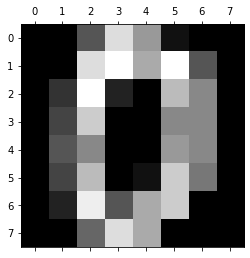

In [4]:
plt.gray()
plt.matshow(digits.images[0])

<Figure size 432x288 with 0 Axes>

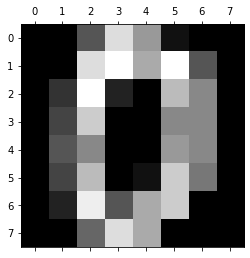

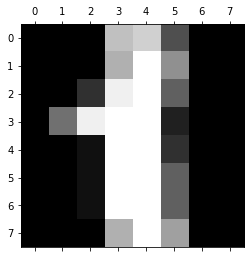

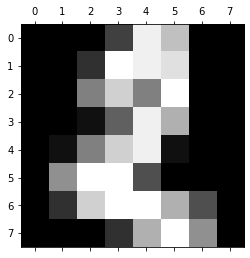

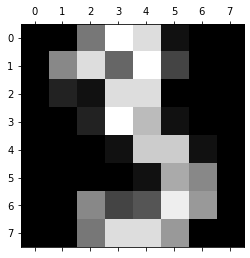

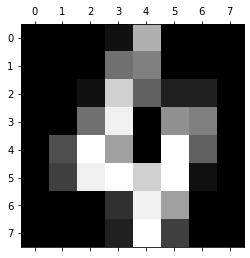

In [5]:
plt.gray()
for i in range(5):
  plt.matshow(digits.images[i])

In [16]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

creating and training logistic regression model

In [7]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [8]:
from sklearn.model_selection import train_test_split 

In [11]:
X_train,X_test ,y_train,y_test =train_test_split(digits.data, digits.target,test_size= 0.2)

In [17]:
len(X_train)

1437

In [18]:
len(X_test)

360

In [19]:
len(y_train)

1437

In [20]:
len(y_test)

360

In [12]:
model.fit(X_train , y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

measuring the accuracy of the model

In [13]:
model.score(X_test, y_test)

0.9777777777777777

In [15]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

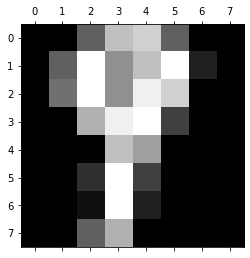

In [21]:
plt.matshow(digits.images[69])

In [22]:
digits.target[69]

9

In [23]:
model.predict([digits.data[69]])

array([9])

confusion matrix

In [25]:
y_predicted = model.predict(X_test)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predicted)
cm

array([[40,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 36,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 42,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 37,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  1, 42,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 21,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 34,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  2, 37]])

Text(69.0, 0.5, 'Truth')

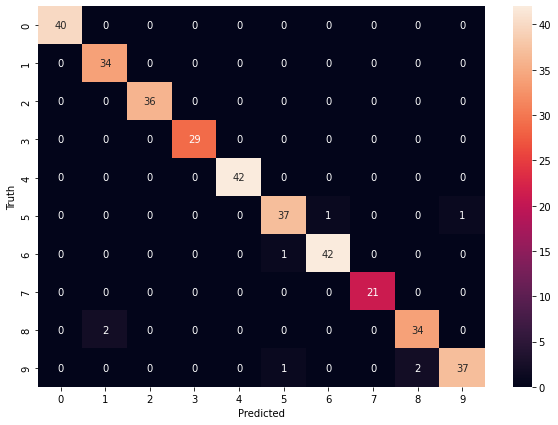

In [26]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm , annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')